# Spherical cap

# Building on the previous notebook we now develop barycentric integrators for both 2D and 3D.

In [18]:

#import polyscope as ps


# ddg imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [19]:
## Imports and physical parameters
# std library

# plotting

# ddg imports
# Allow for relative imports from main library:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#from ddgclib._case1 import *
from hyperct import *
from ddgclib._capillary_rise import * #plot_surface#, curvature
from ddgclib._plotting import *

# Parameters for a water droplet in air at standard laboratory conditions
gamma = 0.0728  # N/m, surface tension of water at 20 deg C
rho = 1000  # kg/m3, density
g = 9.81  # m/s2

# Parameters from EoS:
T_0 = 273.15 + 25  # K, initial tmeperature
P_0 = 101.325  # kPa, ambient pressure
#gamma = IAPWS(T_0)  # N/m, surface tension of water at 20 deg C
gamma = 0.0728  # N/m, surface tension of water at 20 deg C
#rho_0 = eos(P=P_0, T=T_0)  # kg/m3, densi
rho = 1000  # kg/m3, density
g = 9.81  # m/s2

# Capillary rise parameters
r = 2.0  # m, radius of the tube
theta_p = 0 * np.pi/180.0  # Three phase contact angle
theta_p = 20 * np.pi/180.0  # Three phase contact angle
theta_p = 50 * np.pi/180.0  # Three phase contact angle

R = r / np.cos(theta_p)  # = R at theta = 0
# Exact values:
K_f = (1 / R) ** 2
H_f = 1 / R + 1 / R  # 2 / R

def distance_matrix(A, B, squared=False):
    """
    Compute all pairwise distances between vectors in A and B.

    Parameters
    ----------
    A : np.array
        shape should be (M, K)
    B : np.array
        shape should be (N, K)

    Returns
    -------
    D : np.array
        A matrix D of shape (M, N).  Each entry in D i,j represnets the
        distance between row i in A and row j in B.

    See also
    --------
    A more generalized version of the distance matrix is available from
    scipy (https://www.scipy.org) using scipy.spatial.distance_matrix,
    which also gives a choice for p-norm.
    """
    M = A.shape[0]
    N = B.shape[0]

    assert A.shape[1] == B.shape[1], f"The number of components for vectors in A \
        {A.shape[1]} does not match that of B {B.shape[1]}!"

    A_dots = (A*A).sum(axis=1).reshape((M,1))*np.ones(shape=(1,N))
    B_dots = (B*B).sum(axis=1)*np.ones(shape=(M,1))
    D_squared =  A_dots + B_dots -2*A.dot(B.T)

    if squared == False:
        zero_mask = np.less(D_squared, 0.0)
        D_squared[zero_mask] = 0.0
        return np.sqrt(D_squared)

    return D_squared

def cotan(theta):
    return 1 / np.tan(theta)


In [20]:
F, nn, HC, bV, K_f, H_f = cap_rise_init_N(r, theta_p, gamma, N=4, refinement=0, cdist=1e-10, equilibrium=True)

Vertex cache of size: 4:
Vertex: (0.0, 0.0, -0.7279404685324046831)
Connections: (0.0, 2.0000000000000000408, 0.0) (1.732050807568877481, -0.9999999999999995939, 0.0) (-1.7320508075688767606, -1.0000000000000008948, 0.0) 
Vertex: (0.0, 2.0000000000000000408, 0.0)
Connections: (0.0, 0.0, -0.7279404685324046831) (1.732050807568877481, -0.9999999999999995939, 0.0) (-1.7320508075688767606, -1.0000000000000008948, 0.0) 
Vertex: (1.732050807568877481, -0.9999999999999995939, 0.0)
Connections: (0.0, 0.0, -0.7279404685324046831) (0.0, 2.0000000000000000408, 0.0) (-1.7320508075688767606, -1.0000000000000008948, 0.0) 
Vertex: (-1.7320508075688767606, -1.0000000000000008948, 0.0)
Connections: (0.0, 0.0, -0.7279404685324046831) (1.732050807568877481, -0.9999999999999995939, 0.0) (0.0, 2.0000000000000000408, 0.0) 


/home/stefan_endres/projects/ddg/ddgclib/ddgclib/_complex.py:2957: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 640x480 with 1 Axes>, <Axes3D: >, None, None)

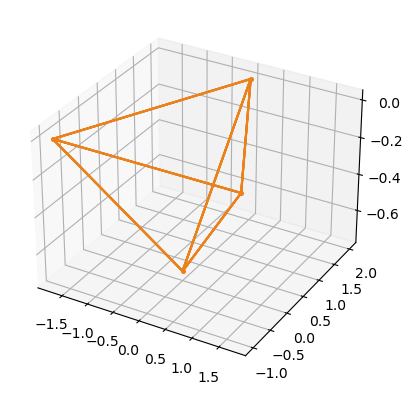

In [21]:

#plot_polyscope(HC)
HC.V.print_out()
#%matplotlib inline
#import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')
HC.plot_complex()
#plt.show()

In [22]:
v = HC.V[(0.0, 0.0, -0.7279404685324046831)]

In [23]:
v.nn

{<ddgclib._vertex.VertexCube at 0x7fdfb04baf10>,
 <ddgclib._vertex.VertexCube at 0x7fdfb4d6ee90>}

In [24]:
F, nn = vectorise_vnn(v)
curvature_dict = b_curvatures_hn_ij_c_ij(F, nn)
print(curvature_dict )

{'F': array([[ 0.        ,  0.        , -0.72794047],
       [ 0.        ,  2.        ,  0.        ],
       [ 1.73205081, -1.        ,  0.        ],
       [-1.73205081, -1.        ,  0.        ]], dtype=float128), 'nn': [[1, 2, 3], [2, 3], [1, 3], [2, 1]], 'n_i': array([ 0.,  0., -1.], dtype=float128), 'E_ij': array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.        ,  0.72794047],
       [ 1.73205081, -1.        ,  0.72794047],
       [-1.73205081, -1.        ,  0.72794047]], dtype=float128), 'E_jk': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.73205081e+00, -3.00000000e+00,  0.00000000e+00],
       [-3.46410162e+00, -1.30087998e-15,  0.00000000e+00],
       [ 1.73205081e+00,  3.00000000e+00,  0.00000000e+00]],
      dtype=float128), 'E_ik': array([[ 0.        ,  0.        ,  0.        ],
       [ 1.73205081, -1.        ,  0.72794047],
       [-1.73205081, -1.        ,  0.72794047],
       [ 0.        ,  2.        ,  0.72794047]], dty

In [25]:
HNdA_i = curvature_dict['HNdA_i']
C_i = np.sum(curvature_dict['C_ij'])   #(dual area)
C_i, HNdA_i, 

(4.7575033903738903622,
 array([ 2.68665298e-16, -1.78676518e-16,  3.05806423e+00], dtype=float128))

In [26]:
np.sum(HNdA_i/C_i), H_f

(0.64278760968653929825, 0.6427876096865394)

# Barycentric

In [27]:
HC.V.print_out()

Vertex cache of size: 4:
Vertex: (0.0, 0.0, -0.7279404685324046831)
Connections: (0.0, 2.0000000000000000408, 0.0) (1.732050807568877481, -0.9999999999999995939, 0.0) (-1.7320508075688767606, -1.0000000000000008948, 0.0) 
Vertex: (0.0, 2.0000000000000000408, 0.0)
Connections: (0.0, 0.0, -0.7279404685324046831) (1.732050807568877481, -0.9999999999999995939, 0.0) (-1.7320508075688767606, -1.0000000000000008948, 0.0) 
Vertex: (1.732050807568877481, -0.9999999999999995939, 0.0)
Connections: (0.0, 0.0, -0.7279404685324046831) (0.0, 2.0000000000000000408, 0.0) (-1.7320508075688767606, -1.0000000000000008948, 0.0) 
Vertex: (-1.7320508075688767606, -1.0000000000000008948, 0.0)
Connections: (0.0, 0.0, -0.7279404685324046831) (1.732050807568877481, -0.9999999999999995939, 0.0) (0.0, 2.0000000000000000408, 0.0) 


In [28]:
#v1 = HC.

In [29]:
# 
triangle1 = [(0.0, 0.0, -0.7279404685324046831), (0.0, 2.0000000000000000408, 0.0), (1.732050807568877481, -0.9999999999999995939, 0.0)]
triangle2 = [(0.0, 0.0, -0.7279404685324046831), (0.0, 2.0000000000000000408, 0.0), (-1.7320508075688767606, -1.0000000000000008948, 0.0)]
triangle3 = [(0.0, 0.0, -0.7279404685324046831), (1.732050807568877481, -0.9999999999999995939, 0.0), (-1.7320508075688767606, -1.0000000000000008948, 0.0)]
np.mean(triangle1, axis=0), np.mean(triangle2, axis=0), np.mean(triangle3, axis=0)

(array([ 0.57735027,  0.33333333, -0.24264682]),
 array([-0.57735027,  0.33333333, -0.24264682]),
 array([ 2.22044605e-16, -6.66666667e-01, -2.42646823e-01]))

In [30]:
curvature_dict['v_dual_ijl'], curvature_dict['v_dual_ijk']

(array([ 5.07779566e-16, -1.48045795e+00,  3.49744787e-01]),
 array([-1.2821142 ,  0.74022898,  0.34974479]))

In [31]:
dual_eij = np.array([ 0.57735027,  0.33333333, -0.24264682]) - np.array([-0.57735027,  0.33333333, -0.24264682])

In [32]:
f1 = np.array([0.0, 2.0000000000000000408, 0.0]) - np.array([0.0, 0.0, -0.7279404685324046831])
l_eij = np.linalg.norm(f1)
l_dual_eij = np.linalg.norm(dual_eij)
(l_dual_eij / l_eij ) * f1 

array([0.        , 1.08506358, 0.39493084])

In [33]:
dual_a_ij = 0.5 * l_dual_eij * (0.5 * l_eij)  # 1/2 * b * h , where h is only half the primary edge 
dual_a_ij

0.6144033242669664

In [34]:
 (l_dual_eij / l_eij ) * f1 /dual_a_ij, H_f

(array([0.        , 1.76604444, 0.64278761]), 0.6427876096865394)

In [35]:
0.64278761 -  0.642787609686539

3.13460923884179e-10

# NEW

Adapting the compute_vd from the circumcentric:

In [41]:
def compute_vd(HC, cdist =1e-10):
    """
    Computes the dual vertices of a primal vertex cache HC.V on
    each dim - 1 simplex.
    
    Currently only dim = 2 is supported
    
    cdist: float, tolerance for where a unique dual vertex can exist
    
    """
    # Construct dual cache
    HC.Vd = VertexCacheField() 
    
    # Construct dual neighbour sets
    for v in HC.V:
        v.vd = set()
            
    #hcv = copy.copy(HC.V)        
    for v1 in HC.V:
        for v2 in v1.nn:
            # Find all v2.nn also connected to v1:
            v1nn_u_v2nn = v1.nn.intersection(v2.nn)
            for v3 in v1nn_u_v2nn:
                # TODO: Re-implement cache:
                verts = np.zeros([3, 2])
                verts[0] = v1.x_a
                verts[1] = v2.x_a
                verts[2] = v3.x_a
                # Compute the circumcentre:
                cd = circumcenter(verts)
                # Note instead of below, could round off cd in general to say nearest 1e-12
                # Check for uniqueness first (new, expensive, could 
                # be improved by checking duals of neighbours only?):
                for vd_i in HC.Vd:
                    dist = np.linalg.norm(vd_i.x_a - cd)
                    if dist < cdist:
                        cd = vd_i.x_a
                        
                vd = HC.Vd[tuple(cd)]
                # Connect to all primal vertices
                for v in [v1, v2, v3]:
                    v.vd.add(vd)
                    vd.nn.add(v)
                    
    return HC  # self


# Find the Delaunay dual
def triang_dual(points, plot_delaunay=False):
    """
    Compute the Delaunay triangulation plus the dual points. Put into hyperct complex object.
    
    """
    tri = Delaunay(points)
    if plot_delaunay:  # Plot Delaunay complex
        import matplotlib.pyplot as plt
        plt.triplot(points[:,0], points[:,1], tri.simplices)
        plt.plot(points[:,0], points[:,1], 'o')
        plt.show()

    # Put Delaunay back into hyperct Complex object:
    HC = Complex(2)
    for s in tri.simplices:
        for v1i in s:
            for v2i in s:
                if v1i is v2i:
                    continue
                else:
                    v1 = tuple(points[v1i])
                    v2 = tuple(points[v2i])
                    HC.V[v1].connect(HC.V[v2])

    return HC, tri


# Plot duals
def plot_dual_mesh_2D(HC, tri):
    """
    Plot the dual mesh and show edge connectivity. Blue is the primary mesh. Orange is the dual mesh.
    """
    import matplotlib.pyplot as plt
    
    # Find the dual points
    dual_points = []
    for vd in HC.Vd:
        dual_points.append(vd.x_a)
    dual_points = np.array(dual_points)
    # Primal points 
    points = []
    for v in HC.V:
        points.append(v.x_a)
        
    points = np.array(points)
    
    for v in HC.V:
        # "Connect duals":
        for v2 in v.nn:
            v1vdv2vd = v.vd.intersection(v2.vd)  # Cardinality always 1 or 2?
            if len(v1vdv2vd) == 1:
                continue
            v1vdv2vd = list(v1vdv2vd)
            x = [v1vdv2vd[0].x[0], v1vdv2vd[1].x[0]]
            y = [v1vdv2vd[0].x[1], v1vdv2vd[1].x[1]]
            plt.plot(x, y, color='orange')

        for vd in v.vd:
            x = [v.x[0], vd.x[0]]
            y = [v.x[1], vd.x[1]]
            plt.plot(x, y, '--', color='tab:green')
    plt.triplot(points[:,0], points[:,1], tri.simplices, color='tab:blue')
    plt.plot(points[:,0], points[:,1],  'o', color='tab:blue')
    plt.plot(dual_points[:,0], dual_points[:,1], 'o', color='tab:orange')

    plt.show()

# Area computations
def d_area(vp1):
    """
    Compute the dual area of a vertex object vp1, which is the sum of the areas
    of the local dual triangles formed between vp1, its neighbouring vertices, 
    and their shared dual vertices.

    Parameters:
    -----------
    vp1 : object
        A vertex object containing the following attributes:
        - vp1.nn: a list of neighboring vertex objects
        - vp1.vd: a set of dual vertex objects
        - vp1.x_a: a numpy array representing the position of vp1

    Returns:
    --------
    darea : float
        The total dual area of the vertex object vp1
    """

    darea = 0  # Initialize total dual area to zero
    for vp2 in vp1.nn:  # Iterate over neighboring vertex objects
        # Find the shared dual vertices between vp1 and vp2
        vdnn = vp1.vd.intersection(vp2.vd)
        # Compute the midpoint between vp1 and vp2
        mp = (vp1.x_a + vp2.x_a) / 2
        # Compute the height of the dual triangle between vp1, vp2, and a dual vertex
        h = np.linalg.norm(mp - vp1.x_a)
        for vdi in vdnn:  # Iterate over shared dual vertices
            # Compute the base of the dual triangle between vp1, vp2, and vdi
            b = np.linalg.norm(vdi.x_a - mp)
            # Add the area of the dual triangle to the total dual area
            darea += 0.5 * b * h

    return darea

# DDG
def dP(vp1):
    """
    Compute the integrated pressure differential for vertex v     
    """
    dP_i = 0  # Total integrated Laplacian for each vertex
    for vp2 in vp1.nn:  # Iterate over neighboring vertex objects
      #  l_ij = np.linalg.norm(vp2.x_a - vp1.x_a)  # Not used here?
        e_dual = 0  # Initialize total edge dual length to zero
        # Find the shared dual vertices between vp1 and vp2
        vdnn = vp1.vd.intersection(vp2.vd)
        # Compute the midpoint between vp1 and vp2
        mp = (vp1.x_a + vp2.x_a) / 2
        # Compute the height of the dual triangle between vp1, vp2, and a dual vertex
        #h = np.linalg.norm(mp - vp1.x_a)
        #print(f'vdnn = {vdnn})
        for vdi in vdnn:  # Iterate over shared dual vertices
            # Compute the base of the dual triangle between vp1, vp2, and vdi
            b = np.linalg.norm(vdi.x_a - mp)  # dihedral weight
            # Add the area of the dual triangle to the total dual area
            e_dual += b
            if e_dual <= 1e-12:  # TODO: Set tolerance
                e_dual = 0
               
        #w_ij = l_ij/e_dual  # Weight
        #if (w_ij is np.inf) or (e_dual == 0):
        
            continue
        # Compute the area flux for the pressure differential:
        Area = e_dual* 1  # m2, Chosen height was 1 for our 2D test case
        # Compute the dual
        dP_ij = Area * (vp2.P - vp1.P)
        dP_i += dP_ij
        
    return dP_i

def du(vp1):
    """
    Compute the Laplacian of the velocity field for vertex v
    
    TODO: Compare this with the     
    """
    du_i = 0  # Total integrated Laplacian for each vertex
    for vp2 in vp1.nn:  # Iterate over neighboring vertex objects
        l_ij = np.linalg.norm(vp2.x_a - vp1.x_a)
        e_dual = 0  # Initialize total edge dual length to zero
        # Find the shared dual vertices between vp1 and vp2
        vdnn = vp1.vd.intersection(vp2.vd)
        # Compute the midpoint between vp1 and vp2
        mp = (vp1.x_a + vp2.x_a) / 2
        # Compute the height of the dual triangle between vp1, vp2, and a dual vertex
        #h = np.linalg.norm(mp - vp1.x_a)
        #print(f'vdnn = {vdnn})
        for vdi in vdnn:  # Iterate over shared dual vertices
            # Compute the base of the dual triangle between vp1, vp2, and vdi
            b = np.linalg.norm(vdi.x_a - mp)  # dihedral weight
            # Add the area of the dual triangle to the total dual area
            e_dual += b
            if e_dual <= 1e-12:  # TODO: Set tolerance
                e_dual = 0
               
        w_ij = l_ij/e_dual  # Weight
       # print('.')
       # print(f'l_ij = {l_ij}')
       # print(f'e_dual, len(vdnn)  = {e_dual, len(vdnn)}')
       # print(f'w_ij = { w_ij}')
       # print(f'w_ij is np.inf = {w_ij is np.inf}')
       # print(f'w_ij == np.inf = {w_ij == np.inf}')
        if (w_ij is np.inf) or (e_dual == 0):
            continue
        # Compute the dual
        du_ij = w_ij * (vp2.u - vp1.u)
        du_i += du_ij
        
    return du_i

def dudt(v):
    # Equal to the acceleration at a vertex (RHS of equation)
    dudt = -dP(v) + mu * du(v)
    dudt = dudt/v.m  # normalize by mass
    return dudt

## ... to Barycentric

In [72]:
def compute_vd(HC, cdist =1e-10):
    """
    Computes the dual vertices of a primal vertex cache HC.V on
    each dim - 1 simplex.
    
    Currently only dim = 2 is supported
    
    cdist: float, tolerance for where a unique dual vertex can exist
    
    """
    # Construct dual cache
    HC.Vd = VertexCacheField() 
    
    # Construct dual neighbour sets
    for v in HC.V:
        v.vd = set()
            
    #hcv = copy.copy(HC.V)        
    for v1 in HC.V:
        for v2 in v1.nn:
            # Find all v2.nn also connected to v1:
            v1nn_u_v2nn = v1.nn.intersection(v2.nn)
            for v3 in v1nn_u_v2nn:
                # TODO: Re-implement cache:
                verts = np.zeros([3, HC.dim])
                verts[0] = v1.x_a
                verts[1] = v2.x_a
                verts[2] = v3.x_a
                
                # Compute the circumcentre:
                #cd = circumcenter(verts)
                # Compute the barycentre:
                cd = np.mean(verts, axis=0)
                # Note instead of below, could round off cd in general to say nearest 1e-12
                # Check for uniqueness first (new, expensive, could 
                # be improved by checking duals of neighbours only?):
                for vd_i in HC.Vd:
                    dist = np.linalg.norm(vd_i.x_a - cd)
                    if dist < cdist:
                        cd = vd_i.x_a
                        
                vd = HC.Vd[tuple(cd)]
                # Connect to all primal vertices
                for v in [v1, v2, v3]:
                    v.vd.add(vd)
                    vd.nn.add(v)
                    
    return HC  # self

In [65]:
HC = compute_vd(HC, cdist =1e-10)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[ 0.          0.         -0.72794047]


ValueError: could not broadcast input array from shape (3,) into shape (2,)

In [74]:
for v in HC.V:
    print(v.vd)

{<ddgclib._vertex.VertexScalarField object at 0x7fdfaa697a90>, <ddgclib._vertex.VertexScalarField object at 0x7fdfa96e60d0>, <ddgclib._vertex.VertexScalarField object at 0x7fdfb4d56f90>}
{<ddgclib._vertex.VertexScalarField object at 0x7fdfaa697a90>, <ddgclib._vertex.VertexScalarField object at 0x7fdfa96e60d0>, <ddgclib._vertex.VertexScalarField object at 0x7fdfa89ed810>}
{<ddgclib._vertex.VertexScalarField object at 0x7fdfa96e60d0>, <ddgclib._vertex.VertexScalarField object at 0x7fdfb4d56f90>, <ddgclib._vertex.VertexScalarField object at 0x7fdfa89ed810>}
{<ddgclib._vertex.VertexScalarField object at 0x7fdfaa697a90>, <ddgclib._vertex.VertexScalarField object at 0x7fdfb4d56f90>, <ddgclib._vertex.VertexScalarField object at 0x7fdfa89ed810>}


# Plot functions

In [67]:
points = []
for v in HC.V:
    points.append(v.x)

In [68]:
points

[(0.0, 0.0, -0.7279404685324046831),
 (0.0, 2.0000000000000000408, 0.0),
 (1.732050807568877481, -0.9999999999999995939, 0.0),
 (-1.7320508075688767606, -1.0000000000000008948, 0.0)]

TypeError: Cannot cast array data from dtype('float128') to dtype('float64') according to the rule 'safe'

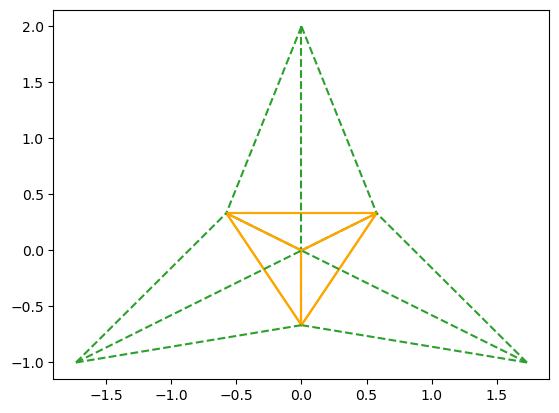

In [73]:
HC, tri = triang_dual(points)
HC.dim = 3
HC = compute_vd(HC, cdist =1e-10)

plot_dual_mesh_2D(HC, tri)

In [76]:
for v in HC.V:
    print(v.x)

(0.0, 0.0, -0.7279404685324046831)
(0.0, 2.0000000000000000408, 0.0)
(1.732050807568877481, -0.9999999999999995939, 0.0)
(-1.7320508075688767606, -1.0000000000000008948, 0.0)


In [77]:
for v in HC.Vd:
    print(v.x)

(0.5773502691896258, 0.3333333333333335, -0.24264682284413489)
(-0.5773502691896256, 0.33333333333333304, -0.24264682284413489)
(2.220446049250313e-16, -0.6666666666666669, -0.24264682284413489)
(2.220446049250313e-16, -1.4802973661668753e-16, 0.0)


In [ ]:
HC, tri = triang_dual(points)
HC.dim = 3
HC = compute_vd(HC, cdist =1e-10)

In [78]:
# Test case traingulation
def incom_Poi(domain, refinements=2):
    """
    Compute the triangulate of a 2D incompressible Poiseuile flow
    """
    HC = Complex(2, domain)
    HC.triangulate()
    for i in range(refinements):
        HC.refine_all()

    points = []
    for v in HC.V:
        points.append(v.x_a)
    points = np.array(points)
    tri = Delaunay(points)
    return points

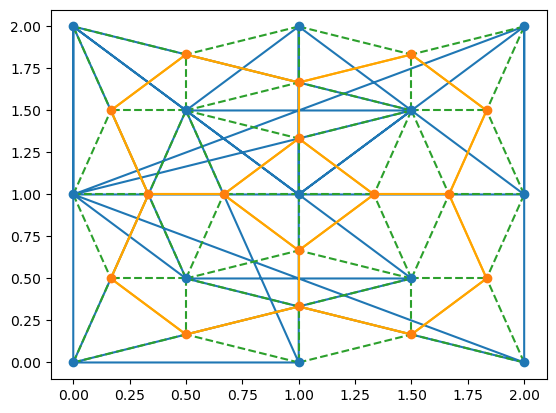

In [81]:
domain = [(0, 2),]*2
points = incom_Poi(domain, refinements=1)
HC, tri = triang_dual(points)
HC = compute_vd(HC, cdist =1e-10)

plot_dual_mesh_2D(HC, tri)

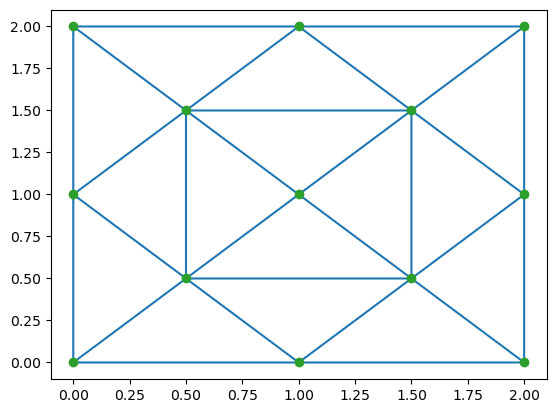

In [82]:
import numpy as np
#points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
from scipy.spatial import Delaunay
tri = Delaunay(points)

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [84]:
dual_points = []
for vd in HC.Vd:
    #print('-')
    #print(vd.x_a)
    dual_points.append(vd.x_a)
    #for vdn in vd.v
dual_points = np.array(dual_points)

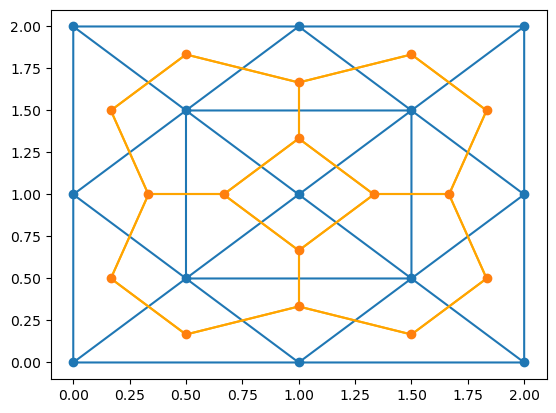

In [85]:
import matplotlib.pyplot as plt
for v in HC.V:
    # "Connect duals":
    for v2 in v.nn:
        v1vdv2vd = v.vd.intersection(v2.vd)  # Cardinality always 1 or 2?
        if len(v1vdv2vd) == 1:
            continue
        v1vdv2vd = list(v1vdv2vd)
        x = [v1vdv2vd[0].x[0], v1vdv2vd[1].x[0]]
        y = [v1vdv2vd[0].x[1], v1vdv2vd[1].x[1]]
        plt.plot(x, y, color='orange')
        
    for vd in v.vd:
        x = [v.x[0], vd.x[0]]
        y = [v.x[1], vd.x[1]]
        #plt.plot(x, y, '--', color='tab:green')
plt.triplot(points[:,0], points[:,1], tri.simplices, color='tab:blue')
plt.plot(points[:,0], points[:,1],  'o', color='tab:blue')
plt.plot(dual_points[:,0], dual_points[:,1], 'o', color='tab:orange')

plt.show()

# Insight:

This is clearly very different from the barycentric duals:

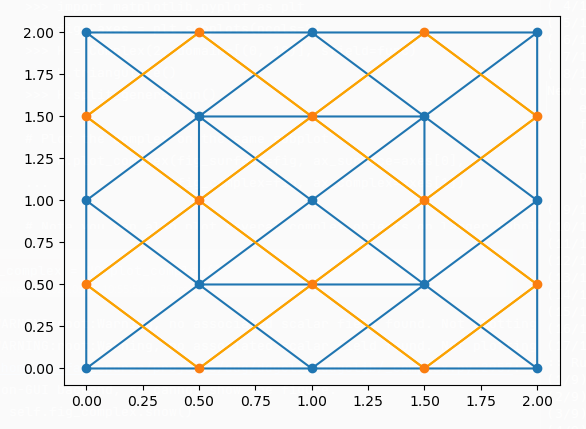

Should be fine??? Haha.

In [91]:
points = [(0.0, 0.0, -0.7279404685324046831),
 (0.0, 2.0000000000000000408, 0.0),
 (1.732050807568877481, -0.9999999999999995939, 0.0),
 (-1.7320508075688767606, -1.0000000000000008948, 0.0)]

points = np.array(points)
points = points[:, :2]
points 

array([[ 0.        ,  0.        ],
       [ 0.        ,  2.        ],
       [ 1.73205081, -1.        ],
       [-1.73205081, -1.        ]])

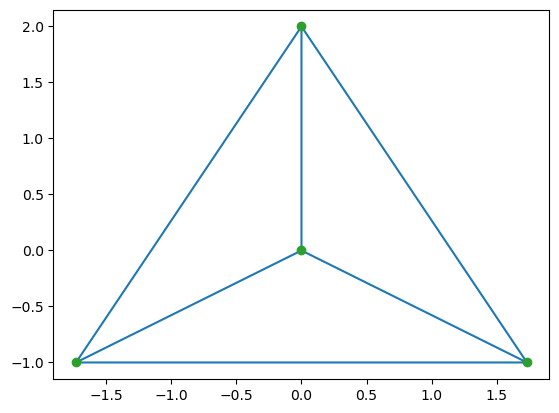

In [92]:
import numpy as np
#points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
from scipy.spatial import Delaunay
tri = Delaunay(points)

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [93]:
dual_points = []
for vd in HC.Vd:
    #print('-')
    #print(vd.x_a)
    dual_points.append(vd.x_a)
    #for vdn in vd.v
dual_points = np.array(dual_points)

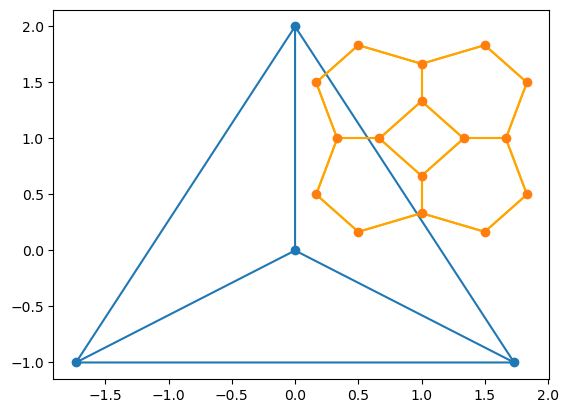

In [94]:
import matplotlib.pyplot as plt
for v in HC.V:
    # "Connect duals":
    for v2 in v.nn:
        v1vdv2vd = v.vd.intersection(v2.vd)  # Cardinality always 1 or 2?
        if len(v1vdv2vd) == 1:
            continue
        v1vdv2vd = list(v1vdv2vd)
        x = [v1vdv2vd[0].x[0], v1vdv2vd[1].x[0]]
        y = [v1vdv2vd[0].x[1], v1vdv2vd[1].x[1]]
        plt.plot(x, y, color='orange')
        
    for vd in v.vd:
        x = [v.x[0], vd.x[0]]
        y = [v.x[1], vd.x[1]]
        #plt.plot(x, y, '--', color='tab:green')
plt.triplot(points[:,0], points[:,1], tri.simplices, color='tab:blue')
plt.plot(points[:,0], points[:,1],  'o', color='tab:blue')
plt.plot(dual_points[:,0], dual_points[:,1], 'o', color='tab:orange')

plt.show()

In [99]:
HC, tri = triang_dual(points, plot_delaunay=False)

/home/stefan_endres/projects/ddg/ddgclib/ddgclib/_complex.py:2957: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()
/home/stefan_endres/projects/ddg/ddgclib/ddgclib/_complex.py:2962: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_surface.show()


(<Figure size 640x480 with 1 Axes>,
 <Axes: >,
 <Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='$x_1$', ylabel='$x_2$', zlabel='$f$'>)

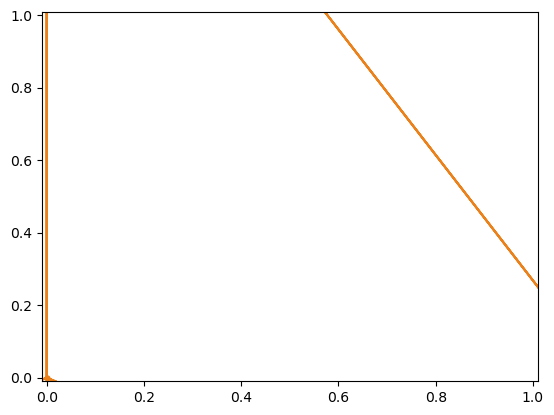

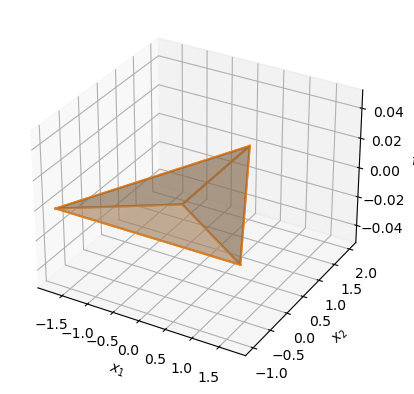

In [100]:
HC.plot_complex()

In [103]:
HC = compute_vd(HC, cdist =1e-10)
dual_points = []
for vd in HC.Vd:
    #print('-')
    #print(vd.x_a)
    dual_points.append(vd.x_a)
    #for vdn in vd.v
dual_points = np.array(dual_points)

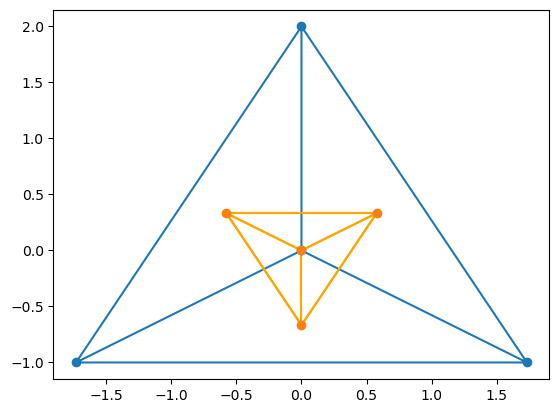

(None,
 array([[ 2.22044605e-16, -1.48029737e-16],
        [ 2.22044605e-16, -6.66666667e-01],
        [ 5.77350269e-01,  3.33333333e-01],
        [-5.77350269e-01,  3.33333333e-01]], dtype=float128))

In [105]:
import matplotlib.pyplot as plt
for v in HC.V:
    # "Connect duals":
    for v2 in v.nn:
        v1vdv2vd = v.vd.intersection(v2.vd)  # Cardinality always 1 or 2?
        if len(v1vdv2vd) == 1:
            continue
        v1vdv2vd = list(v1vdv2vd)
        x = [v1vdv2vd[0].x[0], v1vdv2vd[1].x[0]]
        y = [v1vdv2vd[0].x[1], v1vdv2vd[1].x[1]]
        plt.plot(x, y, color='orange')
        
    for vd in v.vd:
        x = [v.x[0], vd.x[0]]
        y = [v.x[1], vd.x[1]]
        #plt.plot(x, y, '--', color='tab:green')
plt.triplot(points[:,0], points[:,1], tri.simplices, color='tab:blue')
plt.plot(points[:,0], points[:,1],  'o', color='tab:blue')
plt.plot(dual_points[:,0], dual_points[:,1], 'o', color='tab:orange')

plt.show(), dual_points

# 3 D


In [ ]:
def compute_vd(HC, cdist =1e-10):
    """
    Computes the dual vertices of a primal vertex cache HC.V on
    each dim - 1 simplex.
    
    Currently only dim = 2, 3 is supported
    
    cdist: float, tolerance for where a unique dual vertex can exist
    
    """
    # Construct dual cache
    HC.Vd = VertexCacheField() 
    
    # Construct dual neighbour sets
    for v in HC.V:
        v.vd = set()
        
        
            
    #hcv = copy.copy(HC.V)        
    if HC.dim == 2:
        for v1 in HC.V:
            for v2 in v1.nn:
                # Find all v2.nn also connected to v1:
                v1nn_u_v2nn = v1.nn.intersection(v2.nn)
                for v3 in v1nn_u_v2nn:
                    # TODO: Re-implement cache:
                    verts = np.zeros([3, HC.dim])
                    verts[0] = v1.x_a
                    verts[1] = v2.x_a
                    verts[2] = v3.x_a

                    # Compute the circumcentre:
                    #cd = circumcenter(verts)
                    # Compute the barycentre:
                    cd = np.mean(verts, axis=0)
                    # Note instead of below, could round off cd in general to say nearest 1e-12
                    # Check for uniqueness first (new, expensive, could 
                    # be improved by checking duals of neighbours only?):
                    for vd_i in HC.Vd:
                        dist = np.linalg.norm(vd_i.x_a - cd)
                        if dist < cdist:
                            cd = vd_i.x_a

                    vd = HC.Vd[tuple(cd)]
                    # Connect to all primal vertices
                    for v in [v1, v2, v3]:
                        v.vd.add(vd)
                        vd.nn.add(v)
                    
    return HC  # self